## 01 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json

## 02 Import data and set path

In [2]:
path = r'C:\Users\christina.savva\Documents\Data Immersion 6'

In [3]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Cleaned', 'listings_cleaned_final.csv'))

In [4]:
# Latitude and longitude values are already present in my dataset, therefore I don't need to bring in a JSON file

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        3723 non-null   int64  
 1   id                                3723 non-null   int64  
 2   name                              3723 non-null   object 
 3   summary                           3457 non-null   object 
 4   host_id                           3723 non-null   int64  
 5   host_since                        3723 non-null   object 
 6   host_is_superhost                 3723 non-null   object 
 7   host_listings_count               3723 non-null   int64  
 8   host_has_profile_pic              3723 non-null   object 
 9   host_identity_verified            3723 non-null   object 
 10  street                            3723 non-null   object 
 11  neighbourhood_cleansed            3723 non-null   object 
 12  city  

## 6.3.6 Clean your data set — watch for missing and extreme values.

In [5]:
# Drop column that is not required

df = df.drop(columns = ['Unnamed: 0'])

In [6]:
# Checking that missing values from prev. exercise have been filled

df.isnull().sum()

id                                    0
name                                  0
summary                             266
host_id                               0
host_since                            0
host_is_superhost                     0
host_listings_count                   0
host_has_profile_pic                  0
host_identity_verified                0
street                                0
neighbourhood_cleansed                0
city                                  0
state                                 0
zipcode                               9
smart_location                        0
latitude                              0
longitude                             0
is_location_exact                     0
property_type                         1
room_type                             0
accommodates                          0
bed_type                              0
price                                 0
security_deposit                      0
cleaning_fee                          0


In [7]:
# Replace missing values for summary, zipcode and property_type columns with N/A

df['summary'].fillna('N/A', inplace=True)
df['zipcode'].fillna('N/A', inplace=True)
df['property_type'].fillna('N/A', inplace=True)

In [8]:
# Last check for NaN

df.isnull().sum()

id                                  0
name                                0
summary                             0
host_id                             0
host_since                          0
host_is_superhost                   0
host_listings_count                 0
host_has_profile_pic                0
host_identity_verified              0
street                              0
neighbourhood_cleansed              0
city                                0
state                               0
zipcode                             0
smart_location                      0
latitude                            0
longitude                           0
is_location_exact                   0
property_type                       0
room_type                           0
accommodates                        0
bed_type                            0
price                               0
security_deposit                    0
cleaning_fee                        0
guests_included                     0
extra_people

In [10]:
# Duplicates check

dups = df.duplicated()

In [11]:
dups.shape # no dups

(3723,)

<AxesSubplot:xlabel='price', ylabel='Count'>

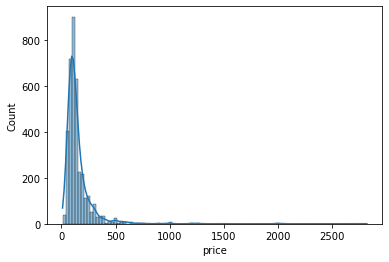

In [12]:
# Extreme values checks for 'price'

sns.histplot(df['price'], bins=100, kde = True)

In [13]:
# Check how many extreme value (prices above USD500)

df[df['price'] >500]

id                                 name  \
115   5869529       Lux Furnished 1BR Newseum Apt.   
147   7630675           Luxury 1BR Apt in Newseum.   
167   6953508        Lux Furnished 1BR Newseum Apt   
172   6781783   Logan Circle Lux Furnished 1BR Apt   
194   8408614    Spectacular Penn Quarter Lux Apt.   
...       ...                                  ...   
3305  8479494                Mansion in Georgetown   
3317  4604242          Need a replacement roommate   
3474   865732         Gorgeous Inauguration Rental   
3613  5648073     Impressive East Capitol Townhome   
3653  1549208  Great Townhouse Capital Hill Metro!   

                                                summary   host_id  host_since  \
115   This apartment on Pennsylvania Avenue, steps f...  30283594  2015-03-30   
147   This beautifully furnished apartment is comple...  30283594  2015-03-30   
167   This apartment on Pennsylvania Avenue, steps f...  30283594  2015-03-30   
172   This perfectly located apartment is complete w...  30283594  2015-03-30   
194   Chic modern contemporary loft overlooking DC. ...  28254613  2015-02-23   
...                                                 ...       ...         ...   
3305  Newly-built Mansion In Georgetown ideal for VI...  44658525  2015-09-20   
3317  Need a replacement roommate for 2 to 3 months....  23462479  2014-11-07   
3474                                                N/A     57867  2009-11-26   
3613  Steps to the Capitol! Beautiful neighborhood o...   8008783  2013-08-07   
3653  Wow!!! You Are Going To Love This Place!! This...   8008783  2013-08-07   

     host_is_superhost  host_listings_count host_has_profile_pic  \
115                  f                  190                    t   
147                  f                  190                    t   
167                  f                  190                    t   
172                  f                  190                    t   
194                  f                    1                    t   
...                ...                  ...                  ...   
3305                 f                    2                    t   
3317                 f                    1                    t   
3474                 f                    1                    t   
3613                 f                   30                    t   
3653                 f                   30                    t   

     host_identity_verified  \
115                       t   
147                       t   
167                       t   
172                       t   
194                       f   
...                     ...   
3305                      f   
3317                      f   
3474                      f   
3613                      t   
3653                      t   

                                                 street  ...  \
115   Pennsylvania Avenue Northwest, Washington, DC ...  ...   
147   Pennsylvania Avenue Northwest, Washington, DC ...  ...   
167   Pennsylvania Avenue Northwest, Washington, DC ...  ...   
172   M Street Northwest, Washington, DC 20005, Unit...  ...   
194   G Street Northwest, Washington, DC 20001, Unit...  ...   
...                                                 ...  ...   
3305  Wisconsin Avenue Northwest, Washington, DC 200...  ...   
3317  Massachusetts Avenue Northwest, Washington, DC...  ...   
3474  East Capitol Street Northeast, Washington, DC ...  ...   
3613  East Capitol Street Southeast, Washington, DC ...  ...   
3653  Independence Avenue Southeast, Washington, DC ...  ...   

     calculated_host_listings_count reviews_per_month  \
115                              16               0.0   
147                              16               0.0   
167                              16               0.0   
172                              16               0.0   
194                               1               0.0   
...                             ...               ...   
3305                           

In [14]:
69/3723

0.018533440773569703

Almost 2% of all listings are priced over USD500 per night. I will not remove them from the DF as they could simply be listings that can accommodate a large number of guests.

In [15]:
# Creating a DF with high prices only to confirm the statement above

df_price_over_USD500 = df[df['price'] >500]

In [16]:
# Creating a subset of the high priced listings to see how many guests they can accommodate

sub_df_price_over_USD500 = df_price_over_USD500[['accommodates', 'price']]

In [17]:
sub_df_price_over_USD500.describe()

accommodates        price
count     69.000000    69.000000
mean       6.942029   863.536232
std        3.917848   450.191645
min        1.000000   515.000000
25%        4.000000   571.000000
50%        6.000000   650.000000
75%        8.000000  1000.000000
max       16.000000  2822.000000

In [18]:
# Creating another subset of listings priced below USD500 to compare mean with the above

df_price_under_USD500 = df[df['price'] <=500]

In [19]:
sub_df_price_under_USD500 = df_price_under_USD500[['accommodates', 'price']]

In [20]:
sub_df_price_under_USD500.describe()

accommodates        price
count   3654.000000  3654.000000
mean       3.124247   135.676245
std        1.889327    80.048466
min        1.000000    10.000000
25%        2.000000    85.000000
50%        2.000000   115.000000
75%        4.000000   159.000000
max       16.000000   500.000000

High priced listings (above USD500 per night) can accommodate an average of 7 guests at an avg price of USD864 per night, compared with listings that are priced below USD500 that can accommodate 3 guests at nightly average prices of USD136. This confirms my assumption above and hence why I will not remove any extreme values from this DF.

## 6.2.7 Create a choropleth map using a variable of your choice.

In [21]:
# How many neighbourhoods are there, that could go into the map?

df['neighbourhood_cleansed'].value_counts()

Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View                                           461
Dupont Circle, Connecticut Avenue/K Street                                                           366
Capitol Hill, Lincoln Park                                                                           304
Shaw, Logan Circle                                                                                   289
Union Station, Stanton Park, Kingman Park                                                            285
Edgewood, Bloomingdale, Truxton Circle, Eckington                                                    250
Kalorama Heights, Adams Morgan, Lanier Heights                                                       236
Downtown, Chinatown, Penn Quarters, Mount Vernon Square, North Capitol Street                        184
Brightwood Park, Crestwood, Petworth                                                                 169
Howard University, Le Droit Park, Cardozo/Shaw         

In [22]:
# Also checking 'smart_location' to see if useable for the map 

df['smart_location'].value_counts()

Washington, DC                         3628
Washington, D.C., DC                     63
Silver Spring, MD                         8
Takoma Park, MD                           6
Mount Rainier, MD                         5
Hyattsville, MD                           2
Washington , DC                           2
Capitol Heights, MD                       1
Annapolis, MD                             1
Arlington, VA                             1
Dupont Circle, DC                         1
chevy chase, MD                           1
New York, NY                              1
Adams Morgan, Washington DC               1
Columbia Heights, middle of DC!, DC       1
Capitol Hill, Washington, DC              1
Name: smart_location, dtype: int64

In [23]:
# Need to clean a few smart locations, even though I won't be using this field for the map

df['smart_location'] = df['smart_location'].replace(['Washington, D.C., DC'],'Washington, DC')
df['smart_location'] = df['smart_location'].replace(['chevy chase, MD'],'Chevy chase, MD')
df['smart_location'] = df['smart_location'].replace(['Adams Morgan, Washington DC'],'Adams Morgan, DC')
df['smart_location'] = df['smart_location'].replace(['Columbia Heights, middle of DC!, DC'],'Columbia Heights, DC')
df['smart_location'] = df['smart_location'].replace(['Capitol Hill, Washington, DC'],'Capitol Hill, DC')
df['smart_location'] = df['smart_location'].replace(['Washington , DC'],'Washington, DC')

In [24]:
df['smart_location'].value_counts().sort_index(ascending=True)

Adams Morgan, DC           1
Annapolis, MD              1
Arlington, VA              1
Capitol Heights, MD        1
Capitol Hill, DC           1
Chevy chase, MD            1
Columbia Heights, DC       1
Dupont Circle, DC          1
Hyattsville, MD            2
Mount Rainier, MD          5
New York, NY               1
Silver Spring, MD          8
Takoma Park, MD            6
Washington, DC          3693
Name: smart_location, dtype: int64

In [25]:
# Moving all locations in DC into Washington DC

df['smart_location'] = df['smart_location'].replace(['Adams Morgan, DC'],'Washington, DC')
df['smart_location'] = df['smart_location'].replace(['Capitol Hill, DC'],'Washington, DC')
df['smart_location'] = df['smart_location'].replace(['Columbia Heights, DC'],'Washington, DC')
df['smart_location'] = df['smart_location'].replace(['Dupont Circle, DC'],'Washington, DC')

In [26]:
df['smart_location'].value_counts().sort_index(ascending=True)

Annapolis, MD             1
Arlington, VA             1
Capitol Heights, MD       1
Chevy chase, MD           1
Hyattsville, MD           2
Mount Rainier, MD         5
New York, NY              1
Silver Spring, MD         8
Takoma Park, MD           6
Washington, DC         3697
Name: smart_location, dtype: int64

In [27]:
# Checking how many different prices there are (284!)

df['price'].value_counts().sort_index(ascending=True)

10      1
20      2
23      2
25      3
28      2
       ..
1300    1
1400    1
1500    1
2000    4
2822    1
Name: price, Length: 284, dtype: int64

In [28]:
# Create price_range categories as those are too many to go onto a map

df.loc[df['price'] < 50, 'price_range'] = '0000-0050'
df.loc[(df['price'] >= 50) & (df['price'] < 75), 'price_range'] = '0050-0075'
df.loc[(df['price'] >= 75) & (df['price'] < 100), 'price_range'] = '0075-0100'
df.loc[(df['price'] >= 100) & (df['price'] < 125), 'price_range'] = '0100-0125'
df.loc[(df['price'] >= 125) & (df['price'] < 150), 'price_range'] = '0125-0150'
df.loc[(df['price'] >= 150) & (df['price'] < 200), 'price_range'] = '0150-0200'
df.loc[(df['price'] >= 200) & (df['price'] < 250), 'price_range'] = '0200-0250'
df.loc[(df['price'] >= 250) & (df['price'] < 350), 'price_range'] = '0250-0350'
df.loc[(df['price'] >= 350) & (df['price'] < 500), 'price_range'] = '0350-0500'
df.loc[(df['price'] >= 500) & (df['price'] < 1000), 'price_range'] = '0500-1000'
df.loc[df['price'] >= 1000, 'price_range'] = '1000+'

In [29]:
df['price_range'].value_counts().sort_index(ascending=True)

0000-0050    127
0050-0075    468
0075-0100    832
0100-0125    646
0125-0150    477
0150-0200    524
0200-0250    229
0250-0350    240
0350-0500     93
0500-1000     67
1000+         20
Name: price_range, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3723 entries, 0 to 3722
Data columns (total 51 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3723 non-null   int64  
 1   name                              3723 non-null   object 
 2   summary                           3723 non-null   object 
 3   host_id                           3723 non-null   int64  
 4   host_since                        3723 non-null   object 
 5   host_is_superhost                 3723 non-null   object 
 6   host_listings_count               3723 non-null   int64  
 7   host_has_profile_pic              3723 non-null   object 
 8   host_identity_verified            3723 non-null   object 
 9   street                            3723 non-null   object 
 10  neighbourhood_cleansed            3723 non-null   object 
 11  city                              3723 non-null   object 
 12  state 

In [31]:
# Exporting updated dataframe

df.to_csv(os.path.join(path, '02 Data', 'Cleaned', 'listings_cleaned_final_6.3.csv'))

In [32]:
# Import ".json" file for the U.S. 

country_geo = r'C:/Users/christina.savva/Documents\Data Immersion 6\02 Data\Original\Neighborhood_Clusters.geojson'

In [33]:
# I want to look at the GeoJSON file contents here too:

f = open(r'C:/Users/christina.savva/Documents\Data Immersion 6\02 Data\Original\Neighborhood_Clusters.geojson',)
  
# returns JSON object as a dictionary
data = json.load(f)
  
# Iterating through the json list
for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'OBJECTID': 1, 'WEB_URL': 'http://planning.dc.gov/', 'NAME': 'Cluster 16', 'NBH_NAMES': 'Colonial Village, Shepherd Park, North Portal Estates', 'TYPE': 'Original', 'GLOBALID': '{8D235E97-D58C-4891-943E-307143103BD9}', 'CREATOR': None, 'CREATED': None, 'EDITOR': None, 'EDITED': None, 'SHAPEAREA': 0, 'SHAPELEN': 0}, 'geometry': {'type': 'Polygon', 'coordinates': [[[-77.02828718423959, 38.98607652258603], [-77.02951803021543, 38.9870369260892], [-77.03094370780099, 38.98814929660376], [-77.03214020474753, 38.98908281873447], [-77.03275150134587, 38.98955974175705], [-77.03332016313875, 38.99000339738596], [-77.03626311955142, 38.99229927133777], [-77.03631759016737, 38.99234176413559], [-77.0409664930156, 38.995968036511364], [-77.0442920116329, 38.99337185152694], [-77.04432055591079, 38.99334957244792], [-77.04695752444417, 38.991290728214615], [-77.04855817868821, 38.990040907036125], [-77.04926202739729, 38.98949790436295], [-77.04914176582463, 38.9

In [34]:
# Create a data frame with just the neighbourhoods and values for prices

data_to_plot_price = df[['neighbourhood_cleansed','price']]
data_to_plot_price.head()

neighbourhood_cleansed  price
0                         Capitol Hill, Lincoln Park    160
1                         Capitol Hill, Lincoln Park    350
2  Lamont Riggs, Queens Chapel, Fort Totten, Plea...     50
3  Southwest Employment Area, Southwest/Waterfron...     95
4  Colonial Village, Shepherd Park, North Portal ...     50

In [35]:
# Setup a folium map at a high-level zoom straight into Washington DC
map = folium.Map(location = [38.9072, -77.0369], zoom_start = 10, control_scale=True)

# Choropleth maps bind Pandas Data Frames and json geometries, allowing to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_price,
    columns = ['neighbourhood_cleansed', 'price'],
    key_on = 'feature.properties.NBH_NAMES',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Price").add_to(map)
folium.LayerControl().add_to(map)

map

In [36]:
map.save('plot_data_price.html')

## 6.2.8 Discuss the results and what they mean in a markdown section.

Does the analysis answer any of your existing research questions?

Yes! I can see that the North East is the most expensive region, driven by the following neighbourhoods:
- Columbia Heights, Mt. Pleasant, Pleasant Plains, Park View (North East outskirts)
- North Michigan Park, Michigan Park & University Heights (North East centre)
- Union Station, Stanton Park, Kingman Park (North East centre)

The cheapest neighbourhoods are the East and South East as well as the North:
- Deanwood, Burrville, Grant Park, Lincoln Heights, Fairmont Heights (East)
- Capitol View, Marshall Heights, Benning Heights (South East)
- Douglas, Shipley Terrace (South East)
- Fairfax Village, Naylor Gardens, Hillcrest, Summit Park  (South East)
- Colonial Village, Shepherd Park, North Portal Estates (North)
- Hawthorne, Barnaby Woods, Chevy Chase (North West)
- Cathedral Heights, McLean Gardens, Glover Park

Does the analysis lead you to any new research questions?
- Are the expensive areas driven by larger properties or are they simply higher priced
- Do reviews display a similar distribution?


NB. The dark grey areas are parks and rivers, thus no data. Source: https://washingtondcmap360.com/washington-dc-neighborhood-map

In [37]:
# Create a data frame with just the neighbourhoods and values for review scores ratings

data_to_plot_reviews = df[['neighbourhood_cleansed','review_scores_rating_new']]
data_to_plot_reviews.head()

neighbourhood_cleansed  review_scores_rating_new
0                         Capitol Hill, Lincoln Park                       0.0
1                         Capitol Hill, Lincoln Park                      94.0
2  Lamont Riggs, Queens Chapel, Fort Totten, Plea...                      95.0
3  Southwest Employment Area, Southwest/Waterfron...                       0.0
4  Colonial Village, Shepherd Park, North Portal ...                       0.0

In [38]:
# Setup a folium map at a high-level zoom straight into Washington DC
map = folium.Map(location = [38.9072, -77.0369], zoom_start = 10, control_scale=True)

# Choropleth maps bind Pandas Data Frames and json geometries.This allows us to quickly visualize data combinations
folium.Choropleth(
    geo_data = country_geo, 
    data = data_to_plot_reviews,
    columns = ['neighbourhood_cleansed', 'review_scores_rating_new'],
    key_on = 'feature.properties.NBH_NAMES',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    legend_name = "Price").add_to(map)
folium.LayerControl().add_to(map)

map

This isn't a great map as it includes the listings that don't have reviews yet (light yellow shading). If I have time, I will re-do the maps only for listings with reviews and compare this with the respective prices. 

In [39]:
map.save('plot_data_reviews.html')